In [1]:
import numpy as np
import pandas as pd
from maiagomes.testing import Data_handler

In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [40]:
df = pd.read_csv("../../investing_poc/data/mining/merged/all_quotes.csv")

In [62]:
data_h = Data_handler(df = df, date_var="Date", add_cash=False, filter_out="Date > '2023-01-01'")


In [63]:
daily_df = data_h.get_last_events_by("D").reset_index(drop = True)

In [64]:
ts = np.log( daily_df['GOOGL'])
# ts = daily_df['GOOGL']

In [65]:
from itertools import product

In [66]:

def auto_tune_arima(
    ts, p_values=range(0, 3), d_values=range(0, 2), q_values=range(0, 3)
):
    split_point = int(len(ts) * 0.9)  # Adjust the split percentage as needed

    # Split the time series into training and testing sets
    train_data = ts[:split_point]
    test_data = ts[split_point:]
    best_mse = float("inf")
    best_order = None

    for p, d, q in product(p_values, d_values, q_values):
        model = sm.tsa.ARIMA(train_data, order=(p, d, q))
        try:
            results = model.fit()
            predicted = results.get_forecast(steps = len(test_data))
            error = predicted.predicted_mean - test_data
            mse = (error**2).sum()
            # aic = results.aic
            if mse < best_mse:
                best_mse = mse
                best_order = (p, d, q)
        except:
            continue
    return best_order


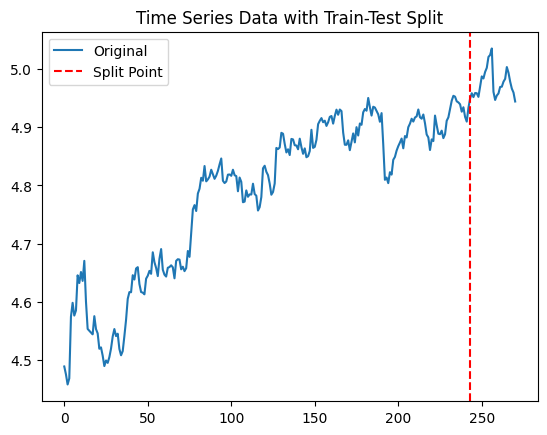

/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-in

                               SARIMAX Results                                
Dep. Variable:                  GOOGL   No. Observations:                  243
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 607.411
Date:                Sun, 18 Feb 2024   AIC                          -1212.822
Time:                        07:44:26   BIC                          -1209.333
Sample:                             0   HQIC                         -1211.417
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   2.04e-05     18.998      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               159.08
Prob(Q):                              0.54   Pr

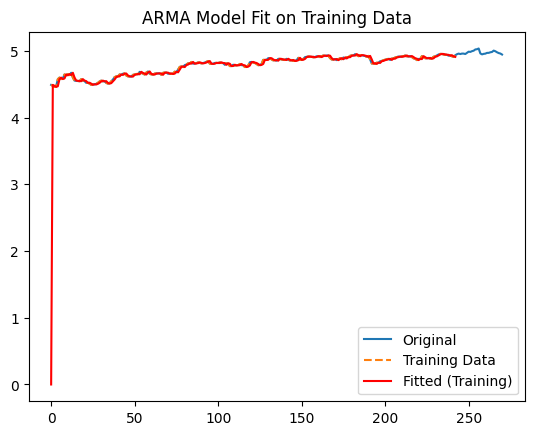

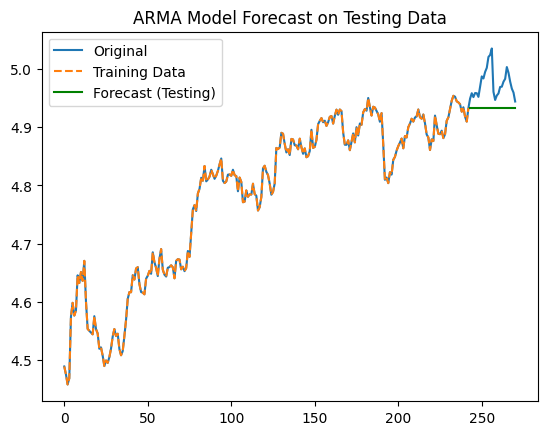

/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

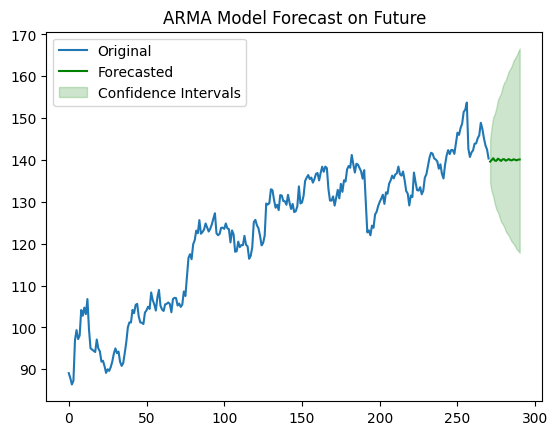

In [67]:
embargo = 0
split_point = int(len(ts) * 0.9)  # Adjust the split percentage as needed

# Split the time series into training and testing sets
train_data = ts[:split_point]
test_data = ts[split_point:]

# Plot the original time series
plt.plot(ts, label='Original')
plt.axvline(x=split_point, color='red', linestyle='--', label='Split Point')
plt.legend()
plt.title('Time Series Data with Train-Test Split')
plt.show()

# Fit an ARMA model on the training data
order = (1, 1)  # Replace p and q with desired values
model = sm.tsa.ARIMA(train_data, order=auto_tune_arima(train_data))
results = model.fit()

# Print model summary
print(results.summary())

# Plot the original time series, the training data, and the fitted values
plt.plot(ts, label='Original')
plt.plot(train_data, label='Training Data', linestyle='--')
plt.plot(results.fittedvalues, color='red', label='Fitted (Training)')
plt.legend()
plt.title('ARMA Model Fit on Training Data')
plt.show()

# Forecast on the testing data
forecast_values = results.predict(start=len(train_data)+embargo, end=len(ts)-1)

# Plot the original time series, the training data, and the forecasted values
plt.plot(ts, label='Original')
plt.plot(train_data, label='Training Data', linestyle='--')
plt.plot(forecast_values, color='green', label='Forecast (Testing)')
plt.legend()
plt.title('ARMA Model Forecast on Testing Data')
plt.show()

# Plot the original time series, the training data, and the forecasted values
model = sm.tsa.ARIMA(ts, order=auto_tune_arima(ts))
results = model.fit()
forecast_values = results.get_forecast(steps=20)
confidence_intervals = forecast_values.conf_int()
plt.plot(np.exp(ts), label='Original')
plt.plot(np.exp(forecast_values.predicted_mean), color='green', label='Forecasted')
# Plot the confidence intervals
plt.fill_between(np.arange(len(ts), len(ts) + len(forecast_values.predicted_mean)),
                 np.exp(confidence_intervals.iloc[:, 0]),
                 np.exp(confidence_intervals.iloc[:, 1]),
                 color='green', alpha=0.2, label='Confidence Intervals')

plt.legend()
plt.title('ARMA Model Forecast on Future')
plt.show()



In [50]:
def get_arma_prediction(ts, split_perc = .9, p = 1, q = 1, embargo = 0, alpha = .05):
    split_point = int(len(ts) * split_perc)  


    train_data = ts[:split_point]
    test_data = ts[split_point:]

    model = sm.tsa.ARIMA(train_data, order=(p,q,0))
    results = model.fit()

    forecast_values = results.get_forecast(steps = len(test_data))
    final_price = ts.values[-1]
    predicted = forecast_values.predicted_mean
    outside_conf_int = (( final_price - forecast_values.conf_int(alpha = alpha).values[-1,])>0).sum()!=1
    forecast_error = (final_price - predicted.values[-1])/predicted.values[-1]
    return results.fittedvalues, predicted, forecast_error, outside_conf_int


In [51]:
daily_df = data_h.get_last_events_by("D").reset_index(drop=True)

In [52]:
from glob import glob
import json

mmar_results = {}
for __file__ in glob("../data/old_model_results/*"):
    date = __file__.split("/")[-1].split("_")[-1].replace(".json","")
    _ = json.load(open(__file__,"rb"))
    mmar_results[date] = {k:v for k,v in _.items() if k in data_h.symbolList}

In [53]:
_results_ = mmar_results['2023-10-31']

In [54]:
### Get pred errors across stocks

for sym in list(daily_df.columns)[1:]:
    _tmp_ = get_arma_prediction(daily_df[sym],split_perc=.98,p=1,q = 1, alpha = .3)
    _results_[sym]['error'] = _tmp_[2]
    _results_[sym]['isOutside'] = _tmp_[3]

In [58]:
_tmp_

(0       0.000000
 1      52.890001
 2      54.214543
 3      54.408004
 4      53.520421
          ...    
 544    33.845000
 545    33.845000
 546    33.845000
 547    33.845000
 548    33.845000
 Length: 549, dtype: float64,
 549    33.845
 550    33.845
 551    33.845
 552    33.845
 553    33.845
 554    33.845
 555    33.845
 556    33.845
 557    33.845
 558    33.845
 559    33.845
 560    33.845
 Name: predicted_mean, dtype: float64,
 0.0,
 False)

In [55]:
summary_df = pd.DataFrame(_results_).T

In [56]:
summary_df["error2"] = summary_df["error"]**2

In [57]:
summary_df

H    alpha0        mu    sigma2       N     error isOutside  \
BTC   0.516129  0.554688  1.074707  0.496343  472466       0.0     False   
ETH   0.537815  0.632812  1.176636  1.173542  472466       0.0     False   
BNB        0.5  0.632812  1.265625  1.764774  472466       0.0     False   
SOL   1.113043  0.492188    0.4422  3.705945  472466 -0.223709     False   
XRP   0.467153  0.554688  1.187378  1.244912  472466       0.0     False   
...        ...       ...       ...       ...     ...       ...       ...   
TEVA  0.533333  0.617188  1.157227  1.044591  675581       0.0     False   
CVX   0.463768  0.523438  1.128662  0.854813  675450       0.0     False   
SU    0.463768  0.554688  1.196045  1.302494  675630       0.0     False   
TWTR  0.442907  0.617188  1.393494  2.614315  675627       0.0     False   
V     0.472325  0.554688  1.174377  1.158539  675630       0.0     False   

        error2  
BTC        0.0  
ETH        0.0  
BNB        0.0  
SOL   0.050046  
XRP        0.0  
...        ...  
TEVA       0.0  
CVX        0.0  
SU         0.0  
TWTR       0.0  
V          0.0  

[86 rows x 8 columns]

In [30]:
summary_df.corr()

H    alpha0        mu    sigma2         N     error  \
H          1.000000  0.185964 -0.762094  0.075086 -0.355581 -0.283682   
alpha0     0.185964  1.000000  0.363269  0.229741 -0.140086  0.222357   
mu        -0.762094  0.363269  1.000000  0.436807  0.199613  0.311070   
sigma2     0.075086  0.229741  0.436807  1.000000 -0.115585 -0.076968   
N         -0.355581 -0.140086  0.199613 -0.115585  1.000000  0.220752   
error     -0.283682  0.222357  0.311070 -0.076968  0.220752  1.000000   
isOutside -0.007849  0.015368 -0.002118 -0.031404  0.101991  0.338658   
error2     0.319116 -0.054142 -0.265324  0.095433 -0.190393 -0.776497   

           isOutside    error2  
H          -0.007849  0.319116  
alpha0      0.015368 -0.054142  
mu         -0.002118 -0.265324  
sigma2     -0.031404  0.095433  
N           0.101991 -0.190393  
error       0.338658 -0.776497  
isOutside   1.000000  0.086445  
error2      0.086445  1.000000

In [31]:
import seaborn as sns

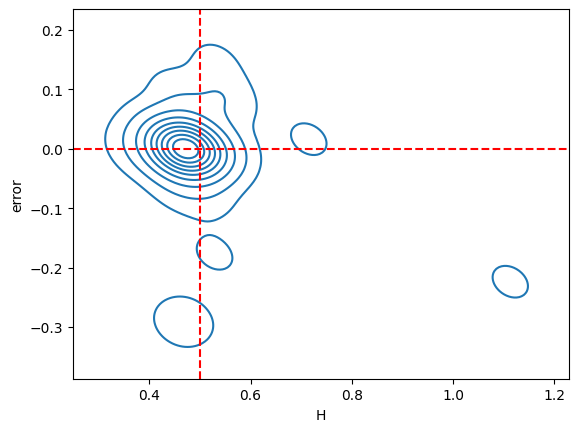

In [32]:
sns.kdeplot(summary_df, x = 'H',y = 'error')
plt.axvline(.5, color='red', linestyle='--', label='Random market')
plt.axhline(0, color='red', linestyle='--', label='Random market')


<Axes: xlabel='H', ylabel='error'>

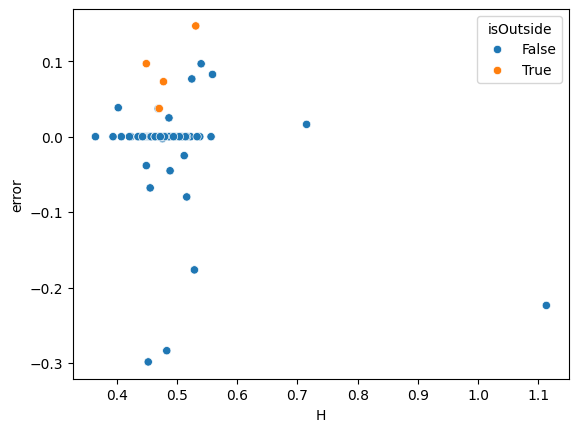

In [33]:
sns.scatterplot(summary_df, x = 'H', y = 'error', hue = 'isOutside')

<Axes: xlabel='alpha0', ylabel='error'>

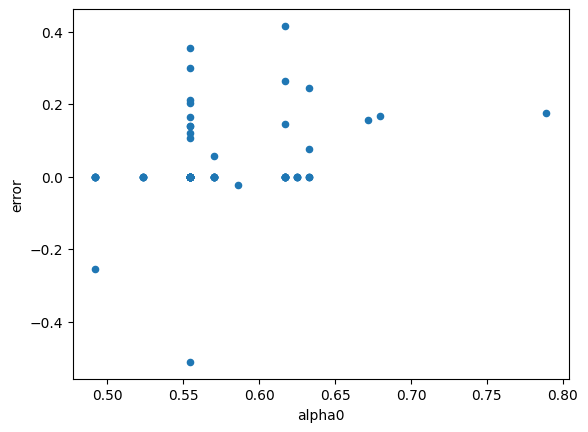

In [341]:
summary_df.plot(x = 'alpha0', y = 'error', kind = 'scatter')